In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [26]:
def read_file(filename):
    df = pd.read_excel('beasiswa_test.xlsx')
    print(df.shape)
    df['Status Kelayakan'] = df['Status Kelayakan'].apply(lambda x: x.strip().lower())
    return df

In [27]:
FILE_HO_TRAIN = 'beasiswa_train.xlsx'
FILE_HO_TEST = 'beasiswa_test.xlsx'

In [28]:
df_ho_train = read_file('beasiswa_train.xlsx')
df_ho_test = read_file('beasiswa_test.xlsx')

(10, 10)
(10, 10)


In [29]:
target_encoder = LabelEncoder()
df_ho_train['Target'] = target_encoder.fit_transform(df_ho_train['Status Kelayakan'])
df_ho_test['Target'] = target_encoder.transform(df_ho_test['Status Kelayakan'])

In [30]:
x_ho_train = df_ho_train.drop(['Status Kelayakan', 'No', 'Nama', 'Target', 'JK'], axis=1)
y_ho_train = df_ho_train['Target']

x_ho_test = df_ho_test.drop(['Status Kelayakan', 'No', 'Nama', 'Target', 'JK'], axis=1)
y_ho_test = df_ho_test['Target']


In [31]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_ho_train, y_ho_train)
model.score(x_ho_train, y_ho_train)
predicted= model.predict(x_ho_test)
	
accuracy_ho = accuracy_score(predicted, y_ho_test) * 100
print('Akurasi pada Algoritma Decision Tree menggunakan Hold-out dengan persentase 70:30 = %s' % accuracy_ho)

Akurasi pada Algoritma Decision Tree menggunakan Hold-out dengan persentase 70:30 = 100.0


In [32]:
clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(x_ho_train, y_ho_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
from sklearn import tree

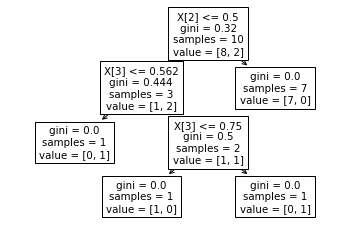

In [41]:
tree.plot_tree(clf);

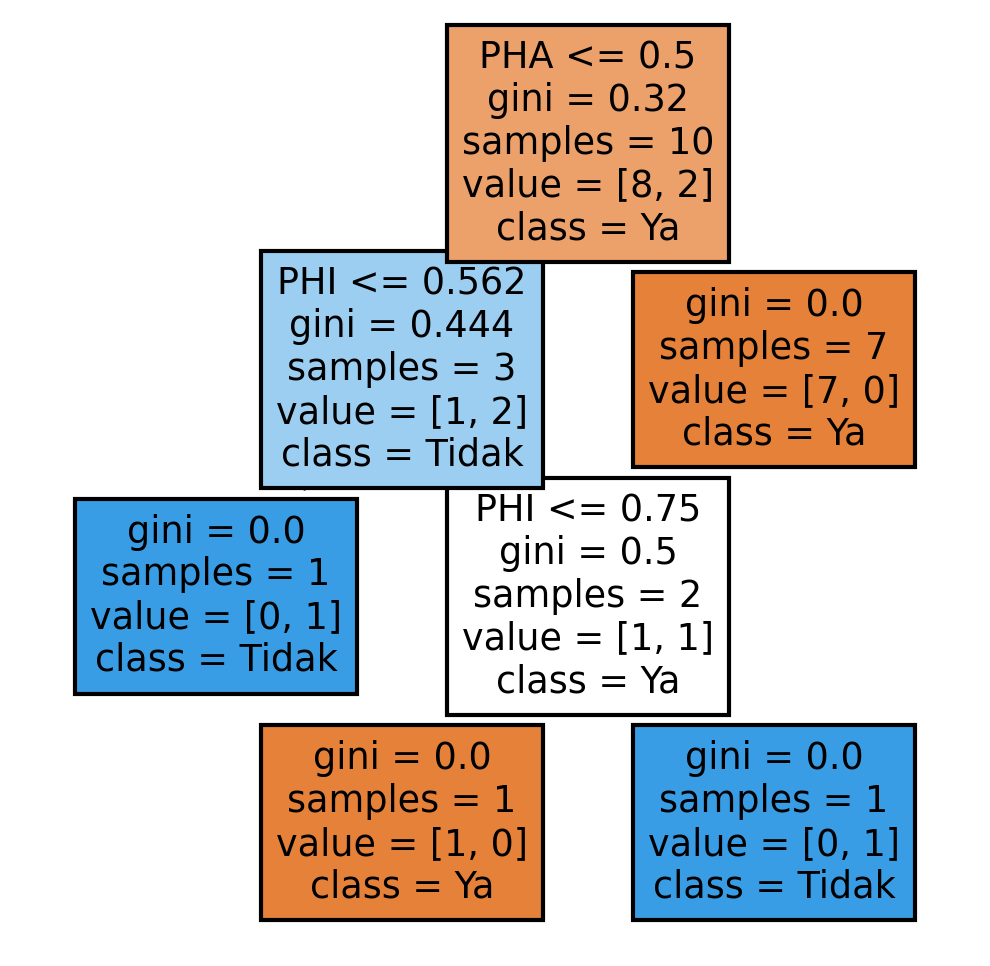

In [42]:
fn=['AT','JT','PHA','PHI','PKA','PKI']
cn=['Ya', 'Tidak']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);fig.savefig('imagename.png')